<a href="https://colab.research.google.com/github/MauLazcano/challengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agregar al READ.me ##
Como desafío adicional, crea un README.md para tu proyecto Alura Store, incluyendo:

- El propósito del análisis realizado.
- La estructura del proyecto y organización de los archivos.
- Ejemplos de gráficos e insights obtenidos.
- Instrucciones para ejecutar el notebook.


### Importación de datos



In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación
##Ingreso por tienda##



In [164]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [165]:
ingresoTienda1 = tienda['Precio'].sum()
ingresoTienda2 = tienda2['Precio'].sum()
ingresoTienda3 = tienda3['Precio'].sum()
ingresoTienda4 = tienda4['Precio'].sum()

print(f'\nIngreso de la tienda 1: {ingresoTienda1}')
print(f'Ingreso de la tienda 2: {ingresoTienda2}')
print(f'Ingreso de la tienda 3: {ingresoTienda3}')
print(f'Ingreso de la tienda 4: {ingresoTienda4}')


Ingreso de la tienda 1: 1150880400.0
Ingreso de la tienda 2: 1116343500.0
Ingreso de la tienda 3: 1098019600.0
Ingreso de la tienda 4: 1038375700.0


##Tienda con mayor ingreso##


In [166]:
ingresos = {
    'Tienda 1': ingresoTienda1,
    'Tienda 2': ingresoTienda2,
    'Tienda 3': ingresoTienda3,
    'Tienda 4': ingresoTienda4
}

ingresoMaximo = max(ingresos, key = ingresos.get)
print(f'La tienda con el mayor ingreso es {ingresoMaximo} con un ingreso de ${round(ingresos[ingresoMaximo], 2)}')

La tienda con el mayor ingreso es Tienda 1 con un ingreso de $1150880400.0


##Gráfica##


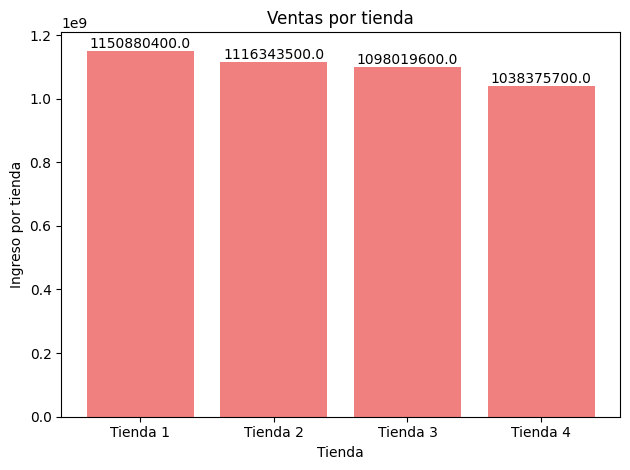

In [167]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas = [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4]

colores = ['green', 'red', 'blue', 'pink']

plt.bar(tiendas, ventas, color = 'lightcoral')
plt.title('Ventas por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso por tienda')

for i, valor in enumerate(ventas):
    plt.text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [168]:
ventasCategoria1 = tienda.groupby("Categoría del Producto")['Precio'].sum().reset_index()
ventasCategoria2 = tienda2.groupby("Categoría del Producto")['Precio'].sum().reset_index()
ventasCategoria3 = tienda3.groupby("Categoría del Producto")['Precio'].sum().reset_index()
ventasCategoria4 = tienda4.groupby("Categoría del Producto")['Precio'].sum().reset_index()

print(f"Ventas por categoría de la Tienda 1:\n{ventasCategoria1}")
print(f"\n\nVentas por categoría de la Tienda 2:\n{ventasCategoria2}")
print(f"\n\nVentas por categoría de la Tienda 3:\n{ventasCategoria3}")
print(f"\n\nVentas por categoría de la Tienda 4:\n{ventasCategoria4}")

Ventas por categoría de la Tienda 1:
    Categoría del Producto       Precio
0  Artículos para el hogar   12698400.0
1     Deportes y diversión   39290000.0
2        Electrodomésticos  363685200.0
3             Electrónicos  429493500.0
4   Instrumentos musicales   91299000.0
5                 Juguetes   17995700.0
6                   Libros    8784900.0
7                  Muebles  187633700.0


Ventas por categoría de la Tienda 2:
    Categoría del Producto       Precio
0  Artículos para el hogar   14746900.0
1     Deportes y diversión   34744500.0
2        Electrodomésticos  348567800.0
3             Electrónicos  410831100.0
4   Instrumentos musicales  104990300.0
5                 Juguetes   15945400.0
6                   Libros   10091200.0
7                  Muebles  176426300.0


Ventas por categoría de la Tienda 3:
    Categoría del Producto       Precio
0  Artículos para el hogar   15060000.0
1     Deportes y diversión   35593100.0
2        Electrodomésticos  329237900.0
3    

##Gráficas##

In [169]:
def ventas_Categoria_Tienda(ventas, tienda):
  plt.figure(figsize=(10, 6))
  plt.bar(ventas['Categoría del Producto'], ventas['Precio'], color='lavender')
  plt.title(f'Ventas por Categoría - {tienda}', fontsize=16)
  plt.xlabel('Categoría', fontsize=12)
  plt.ylabel('Ventas Totales', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()


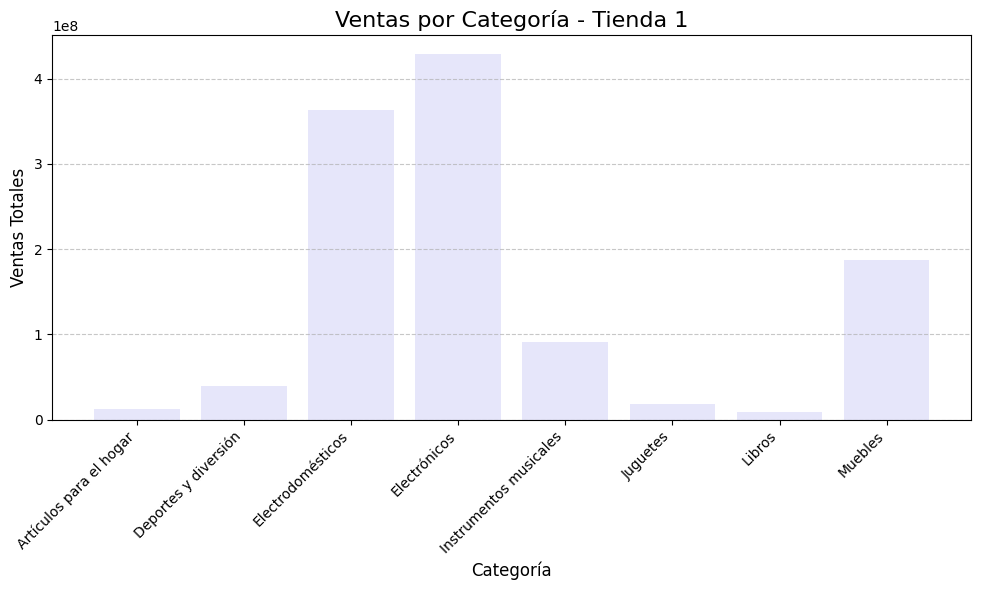

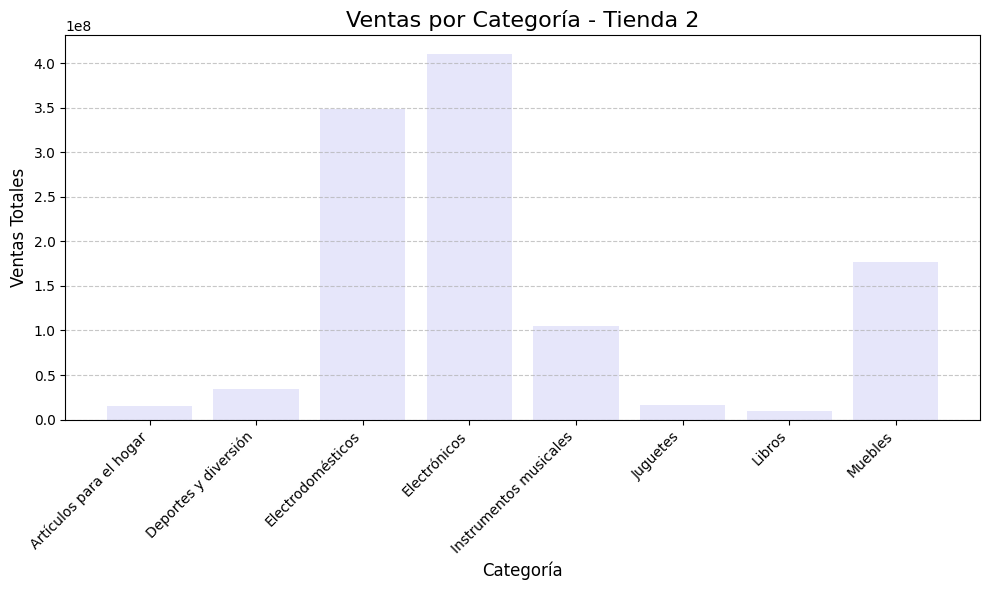

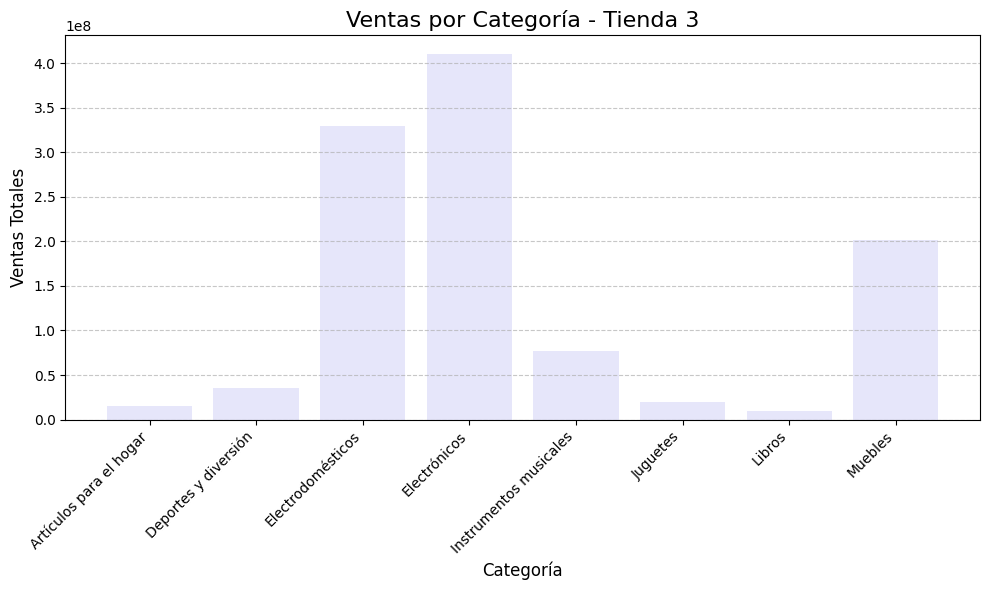

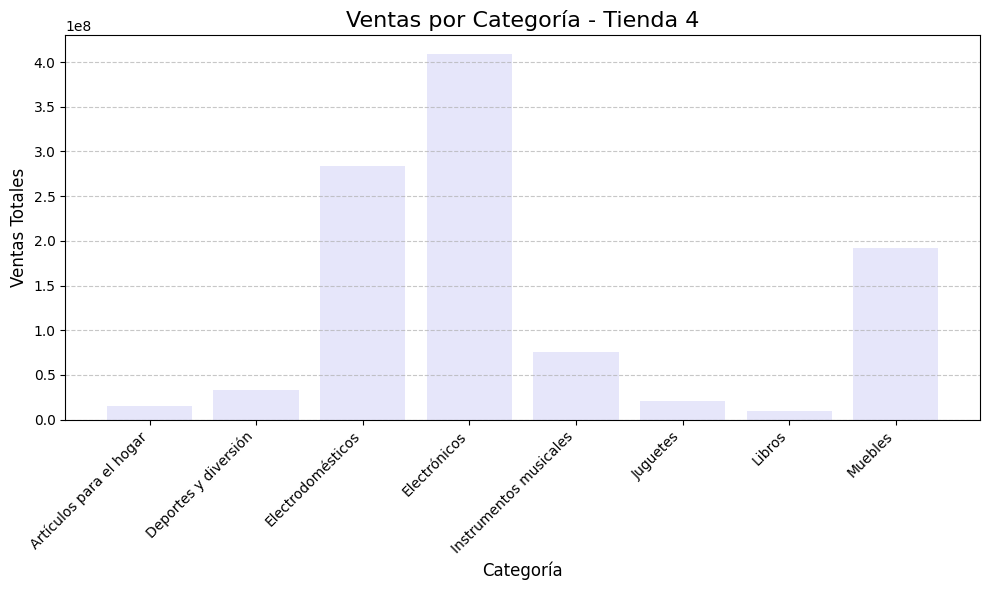

In [170]:
ventas_Categoria_Tienda(ventasCategoria1, 'Tienda 1')
ventas_Categoria_Tienda(ventasCategoria2, 'Tienda 2')
ventas_Categoria_Tienda(ventasCategoria3, 'Tienda 3')
ventas_Categoria_Tienda(ventasCategoria4, 'Tienda 4')

# 3. Calificación promedio de la tienda


In [203]:
calificacionTienda1 = tienda['Calificación'].mean()
calificacionTienda2 = tienda2['Calificación'].mean()
calificacionTienda3 = tienda3['Calificación'].mean()
calificacionTienda4 = tienda4['Calificación'].mean()

print(f'La calificación promedio de la Tienda 1 es de {round(calificacionTienda1,2)} sobre 5.')
print(f'La calificación promedio de la Tienda 1 es de {round(calificacionTienda2,2)} sobre 5.')
print(f'La calificación promedio de la Tienda 1 es de {round(calificacionTienda3,2)} sobre 5.')
print(f'La calificación promedio de la Tienda 1 es de {round(calificacionTienda4,2)} sobre 5.')

La calificación promedio de la Tienda 1 es de 3.98 sobre 5.
La calificación promedio de la Tienda 1 es de 4.04 sobre 5.
La calificación promedio de la Tienda 1 es de 4.05 sobre 5.
La calificación promedio de la Tienda 1 es de 4.0 sobre 5.


In [172]:
calificaciones ={
    'Tienda 1': calificacionTienda1,
    'Tienda 2': calificacionTienda2,
    'Tienda 3': calificacionTienda3,
    'Tienda 4': calificacionTienda4
}

mayorCalificacion = max(calificaciones, key = calificaciones.get)
print(f'La tienda con mejor clasificaicón es {mayorCalificacion} con una valoración de {calificaciones[mayorCalificacion]}')

La tienda con mejor clasificaicón es Tienda 3 con una valoración de 4.048325561678677


##Gráfica##

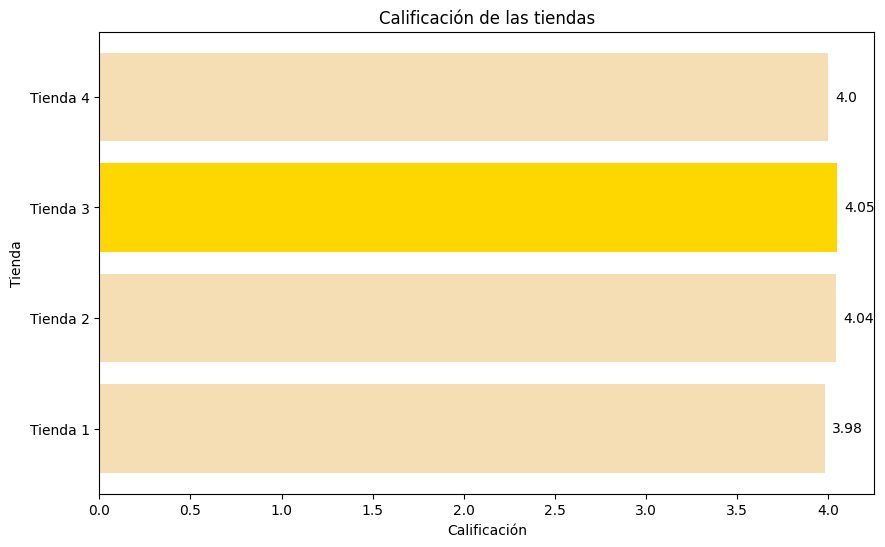

In [175]:
tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificacion = [round(calificacionTienda1, 2), round(calificacionTienda2, 2), round(calificacionTienda3, 2), round(calificacionTienda4, 2)]
colores = ['wheat', 'wheat', 'gold', 'wheat']

plt.figure(figsize=(10, 6))
plt.barh(tienda, calificacion, color = colores)

plt.title("Calificación de las tiendas")
plt.xlabel("Calificación")
plt.ylabel("Tienda")

# Añadir etiquetas con valores al final de cada barra
for i, valor in enumerate(calificacion):
    plt.text(valor*1.01, i, f'{valor}', va='center', fontsize=10)

plt.show()

# 4. Productos más y menos vendidos

##Por tienda##
(Para esta parte correr de nuevo el primer bloque de código en donde se leen los archivos .csv)

In [209]:
productosVendidos1 = tienda.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()
ordenarProductos1 = productosVendidos1.sort_values(by = 'Cantidad de cuotas', ascending = False)

productosVendidos2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()
ordenarProductos2 = productosVendidos2.sort_values(by = 'Cantidad de cuotas', ascending = False)

productosVendidos3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()
ordenarProductos3 = productosVendidos3.sort_values(by = 'Cantidad de cuotas', ascending = False)

productosVendidos4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()
ordenarProductos4 = productosVendidos4.sort_values(by = 'Cantidad de cuotas', ascending = False)

print('\n\n','Más vendidos:\n',ordenarProductos1.head(),'\n\n','Menos vendidos:\n', ordenarProductos1.tail(),'\n')
print('====================================================')
print('\n','Más vendidos:\n',ordenarProductos2.head(),'\n\n','Menos vendidos:\n', ordenarProductos2.tail(),'\n')
print('====================================================')
print('\n','Más vendidos:\n',ordenarProductos3.head(),'\n\n','Menos vendidos:\n', ordenarProductos3.tail(),'\n')
print('====================================================')
print('\n','Más vendidos:\n',ordenarProductos4.head(),'\n\n','Menos vendidos:\n', ordenarProductos4.tail(),'\n')



 Más vendidos:
             Producto  Cantidad de cuotas
40  Secadora de ropa                 214
48     TV LED UHD 4K                 196
32     Mesa de noche                 188
23         Impresora                 182
8          Bicicleta                 178 

 Menos vendidos:
               Producto  Cantidad de cuotas
17  Cuerda para saltar                 100
49         Tablet ABXY                  99
19      Dinosaurio Rex                  94
34             Mochila                  90
13        Celular ABXY                  78 


 Más vendidos:
                      Producto  Cantidad de cuotas
24  Iniciando en programación                 223
25                  Iphone 15                 195
21          Guitarra acústica                 183
33                 Microondas                 179
40           Secadora de ropa                 177 

 Menos vendidos:
            Producto  Cantidad de cuotas
44           Sillón                 100
26    Juego de mesa                  99

In [179]:
productosVendidos = tiendas.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()
ordenarProductos = productosVendidos.sort_values(by = 'Cantidad de cuotas', ascending = False)

print('Más vendidos:\n',ordenarProductos.head(),'\n\nMenos vendidos:\n', ordenarProductos.tail())

Más vendidos:
             Producto  Cantidad de cuotas
40  Secadora de ropa                 649
32     Mesa de noche                 627
38         Pandereta                 625
8          Bicicleta                 614
25         Iphone 15                 611 

Menos vendidos:
           Producto  Cantidad de cuotas
30  Mesa de centro                 469
19  Dinosaurio Rex                 458
13    Celular ABXY                 447
42    Set de vasos                 435
46      Smartwatch                 432


##Gráfica##

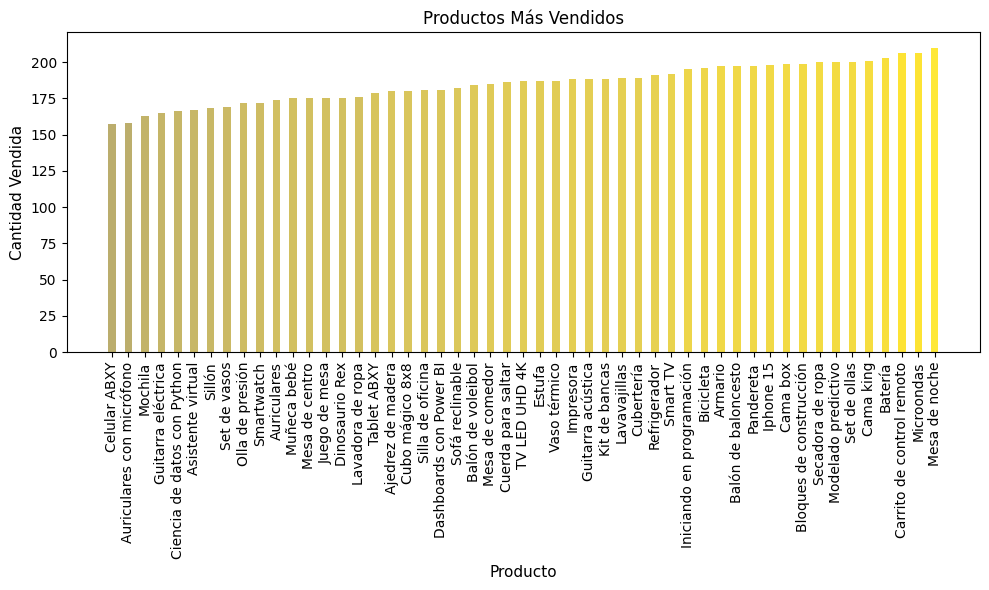

In [180]:
ventasProducto = tiendas['Producto'].value_counts()
ventasPorProducto = ventasProducto.sort_values()

x_pos = np.arange(len(ventasPorProducto)) * 1.75
colores = plt.cm.cividis(ventasPorProducto / max(ventasPorProducto))
plt.figure(figsize = (10,6))
plt.bar(x_pos, ventasPorProducto.values, color = colores)
plt.xticks(x_pos, ventasPorProducto.index, rotation = 90)

plt.title('Productos Más Vendidos')
plt.xlabel('Producto', fontsize = 11)
plt.ylabel('Cantidad Vendida', fontsize = 11)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [205]:
envioTienda1 = tienda['Costo de envío'].mean()
envioTienda2 = tienda2['Costo de envío'].mean()
envioTienda3 = tienda3['Costo de envío'].mean()
envioTienda4 = tienda4['Costo de envío'].mean()

print(envioTienda1)
print(envioTienda2)
print(envioTienda3)
print(envioTienda4)

26018.60958033065
25216.235693090293
24805.680373039424
23459.457167090754


##Gráfica##

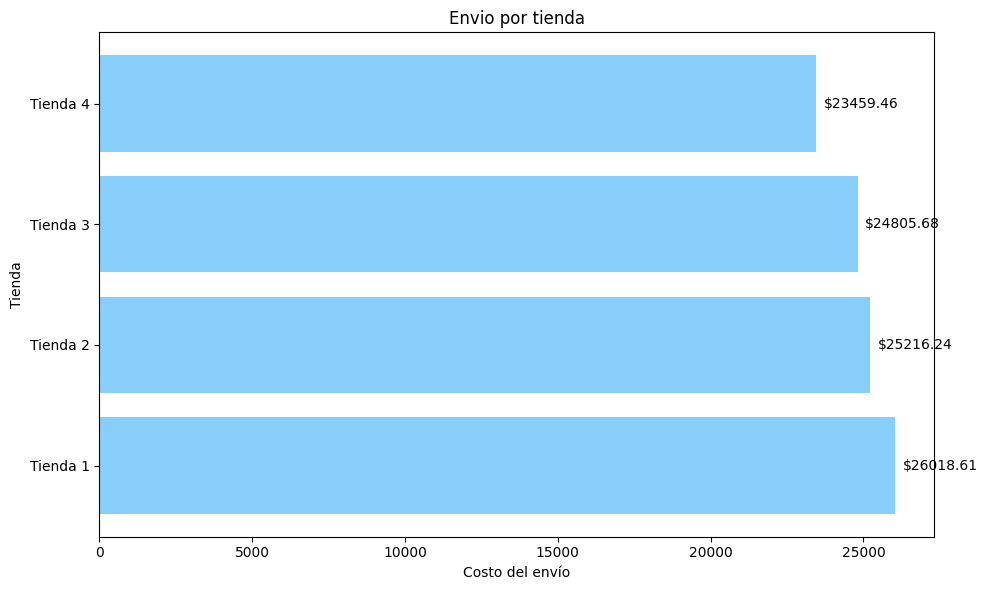

In [182]:
tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificacion = [round(envioTienda1, 2), round(envioTienda2, 2), round(envioTienda3, 2), round(envioTienda4, 2)]

plt.figure(figsize=(10, 6))
plt.barh(tienda, calificacion, color = 'lightskyblue')

plt.title("Envio por tienda")
plt.xlabel("Costo del envío")
plt.ylabel("Tienda")

# Añadir etiquetas con valores al final de cada barra
for i, valor in enumerate(calificacion):
    plt.text(valor*1.01, i, f'${valor}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#Resultados#

Gracias a este análisis de los datos podemos concluir diversas cuestones que se pueden hacer respecto a la información proporcionada.

- Podemos empezar mencionando a la tienda que más ventas tiene de las 4 así como a la tienda que menos ventas ha realizado.
Para esto, tenemos lo siguiente:

In [143]:
ingresoMaximo = max(ingresos, key = ingresos.get)
print(f'La tienda con el mayor ingreso es {ingresoMaximo} con un ingreso de ${round(ingresos[ingresoMaximo], 2)}')

ingresoMinimo = min(ingresos, key = ingresos.get)
print(f'La tienda con el menor ingreso es {ingresoMinimo} con un ingreso de ${round(ingresos[ingresoMinimo], 2)}')

La tienda con el mayor ingreso es Tienda 1 con un ingreso de $1150880400.0
La tienda con el menor ingreso es Tienda 4 con un ingreso de $1038375700.0


Esto se hace más visible en la siguiente gráfica.

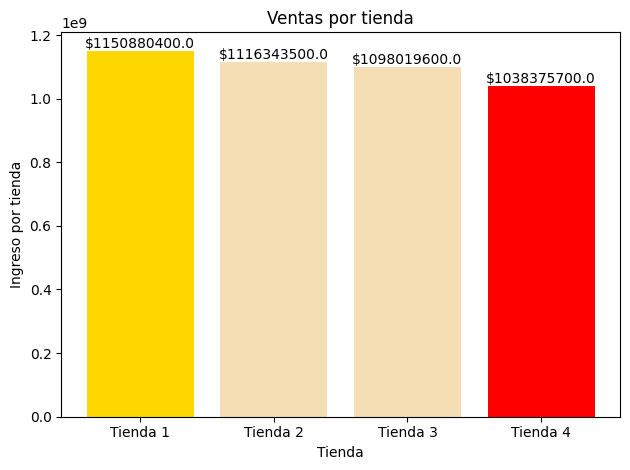

In [154]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas = [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4]

colores = ['gold', 'wheat', 'wheat', 'red']

plt.bar(tiendas, ventas, color = colores)
plt.title('Ventas por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso por tienda')

for i, valor in enumerate(ventas):
    plt.text(i, valor + 50, f'${valor}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- De igual manera pudimos observar que categorías son las más vendidas por tienda, donde es bastante claro que categoría es la que prefiere el público.

Esta es la información recopilada de la tienda 1.

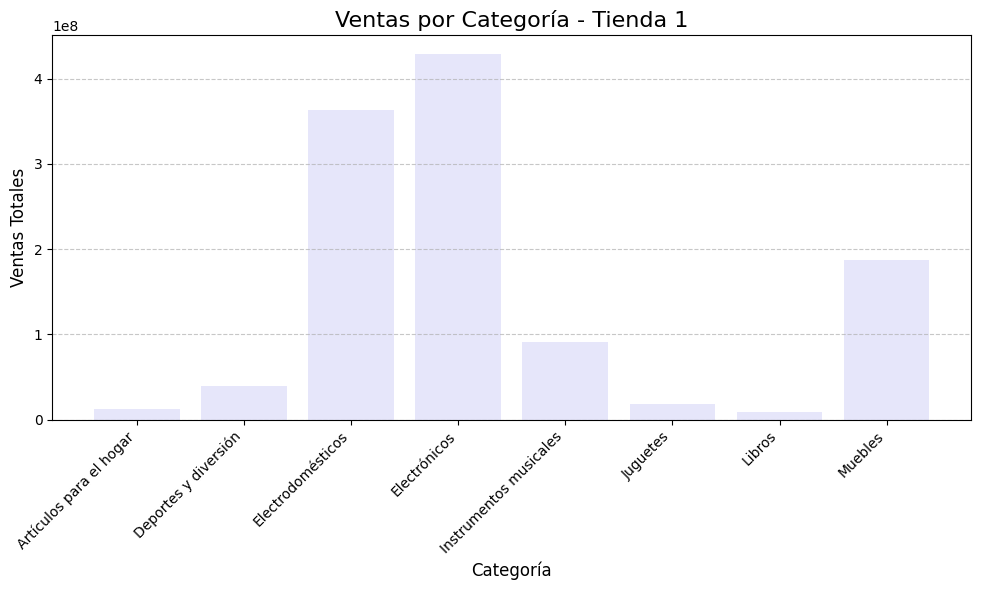

In [156]:
ventas_Categoria_Tienda(ventasCategoria1, 'Tienda 1')

A continuación la informació de la tienda 2.

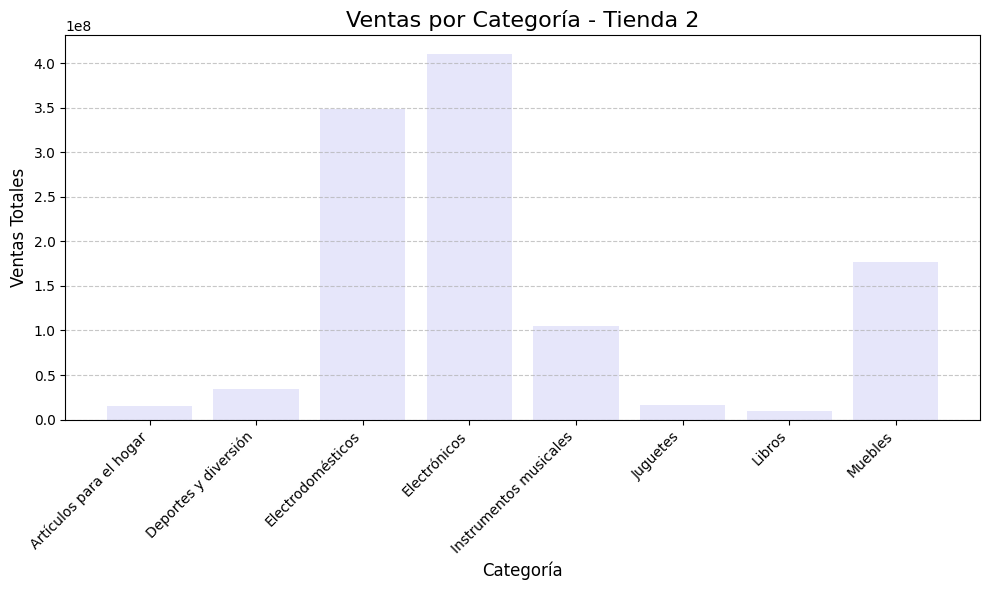

In [157]:
ventas_Categoria_Tienda(ventasCategoria2, 'Tienda 2')

Seguimos con la tienda número 3.

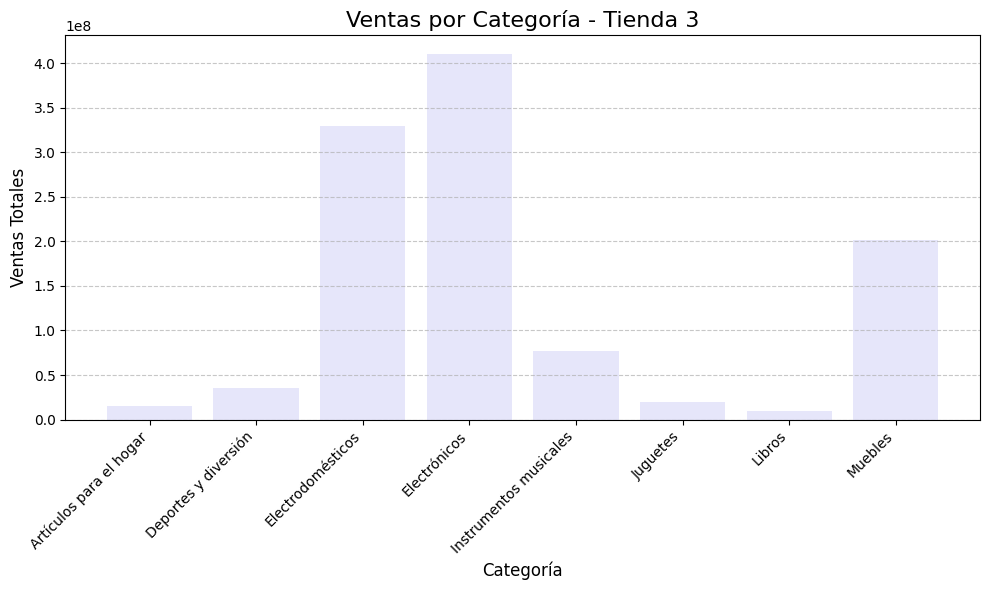

In [158]:
ventas_Categoria_Tienda(ventasCategoria3, 'Tienda 3')

Y por último la tienda número 4.

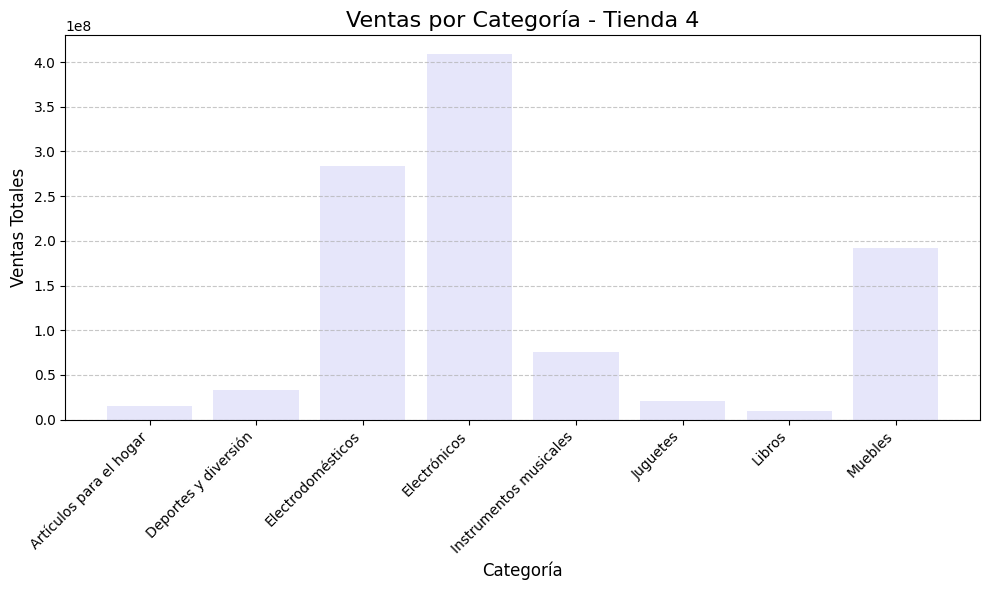

In [159]:
ventas_Categoria_Tienda(ventasCategoria4, 'Tienda 4')

- Pudimos observar también cual fue el artículo mas vendido entre todas las tiendas, para esto, lo vamos a poder visualizar en el siguiente mapa de calor.

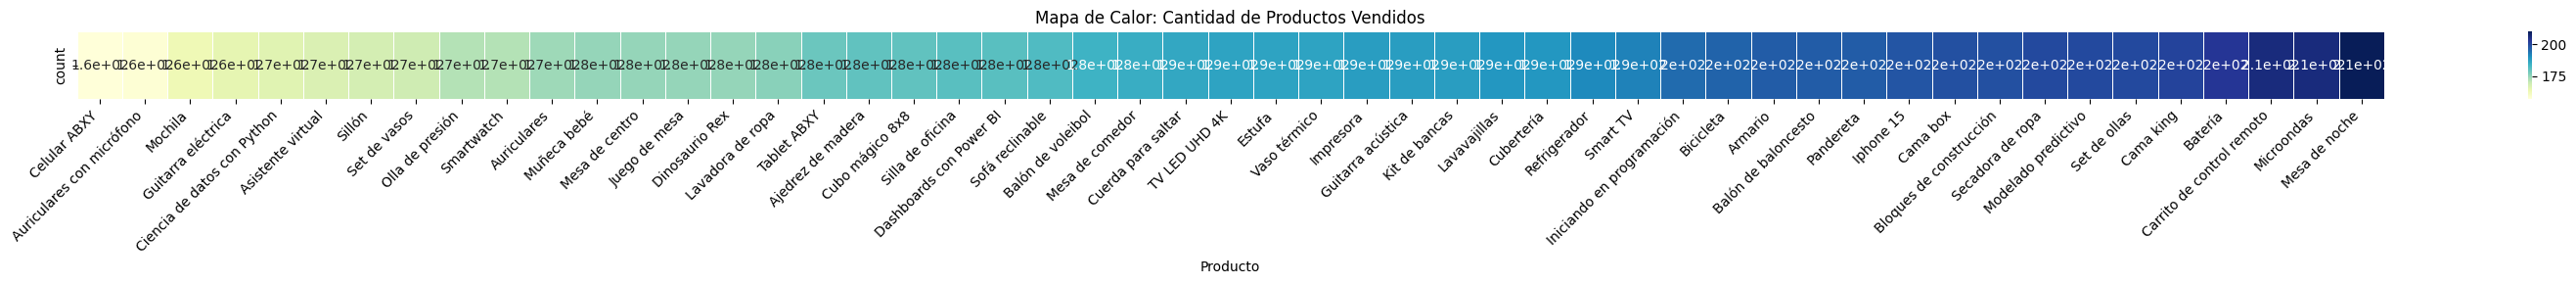

In [191]:
ventasPorProducto = ventasProducto.sort_values()

df_heatmap = pd.DataFrame(ventasPorProducto).T

plt.figure(figsize=(len(df_heatmap.columns)*0.6, 3))  # Ancho depende de la cantidad de productos
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.title("Mapa de Calor: Cantidad de Productos Vendidos")
plt.xlabel("Producto")
plt.ylabel("")
plt.tight_layout()
plt.show()


- Otra metrica que podria resultar interesante al momento de tomar una decisión respecto a que tienda vender, podría ser la valoración o calififcación de cada tienda, la cual podemos ver en la siguiente gráfica,

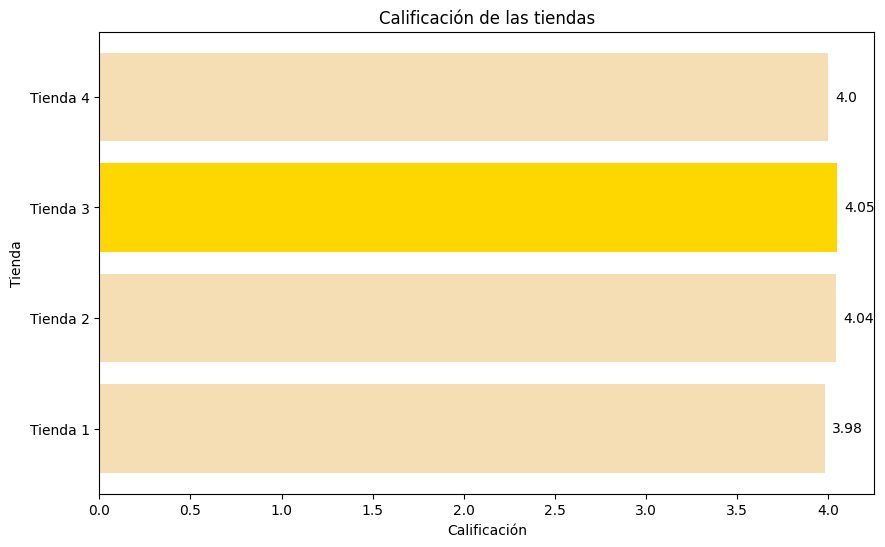

In [193]:
tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificacion = [round(calificacionTienda1, 2), round(calificacionTienda2, 2), round(calificacionTienda3, 2), round(calificacionTienda4, 2)]
colores = ['wheat', 'wheat', 'gold', 'wheat']

plt.figure(figsize=(10, 6))
plt.barh(tienda, calificacion, color = colores)

plt.title("Calificación de las tiendas")
plt.xlabel("Calificación")
plt.ylabel("Tienda")

# Añadir etiquetas con valores al final de cada barra
for i, valor in enumerate(calificacion):
    plt.text(valor*1.01, i, f'{valor}', va='center', fontsize=10)

plt.show()

Se puede observar que todas las tiendas tienen una calificación prácticamente identica, sin embargo, se diferencia por muy poco la tienda con menor calificación

- A continuación podemos observar una gráfica que representa tanto las ventas de cada tienda como su calificación.

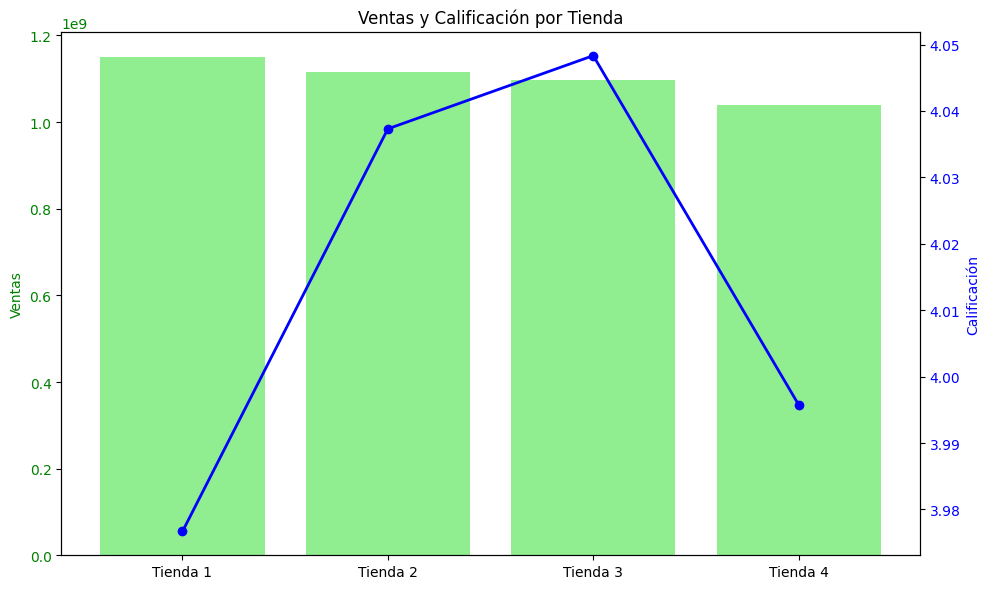

In [195]:
datos = {
    'Tiendas' : ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ventas' : [ingresoTienda1, ingresoTienda2, ingresoTienda3, ingresoTienda4],
    'Calificación' : [calificacionTienda1, calificacionTienda2, calificacionTienda3, calificacionTienda4]
}

df = pd.DataFrame(datos)

fig, ax1 = plt.subplots(figsize=(10,6))

# Barra de ventas
ax1.bar(df['Tiendas'], df['Ventas'], color='lightgreen', label='Ventas')
ax1.set_ylabel('Ventas', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Segundo eje Y para calificación
ax2 = ax1.twinx()
ax2.plot(df['Tiendas'], df['Calificación'], color='blue', marker='o', linewidth=2, label='Calificación')
ax2.set_ylabel('Calificación', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Ventas y Calificación por Tienda')
fig.tight_layout()
plt.show()

#EXTRA#

##Análisis de desempeño geográfico##

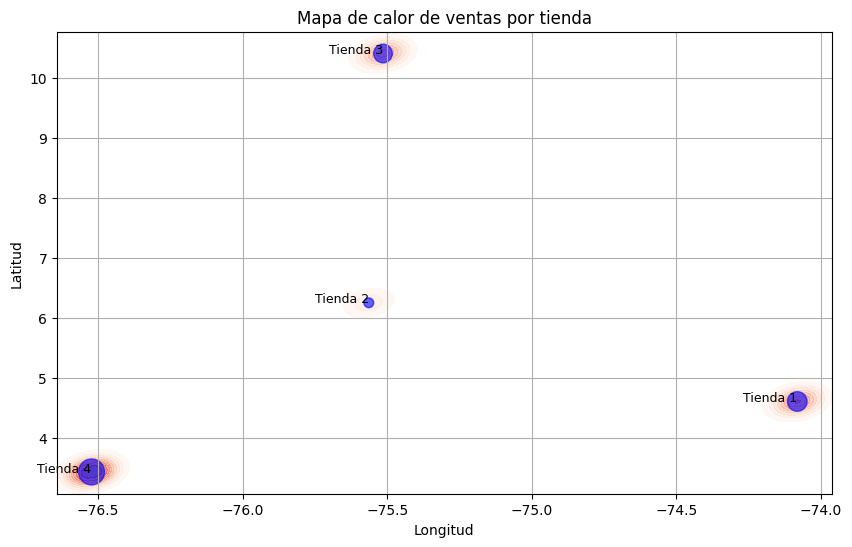

In [213]:
dicGeo = {
    'Tienda' : ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Lat' : [4.60971, 6.25184, 10.39972, 3.43722],
    'Long' : [-74.08175, -75.56359, -75.51444, -76.52250],
    'Ventas' : [200, 50, 180, 350] # Hipoteticas
}

df = pd.DataFrame(dicGeo)

plt.figure(figsize=(10, 6))

# Mapa de calor con kdeplot (seaborn lo suaviza)
sns.kdeplot(
    x=df['Long'],
    y=df['Lat'],
    weights=df['Ventas'],
    cmap="Reds",
    fill=True,
    alpha=0.5,
    bw_adjust=0.05
)

# Puntos de tiendas
plt.scatter(df['Long'], df['Lat'], s=df['Ventas'], color='blue', alpha=0.6)

# Anotar nombres de tiendas
for i, row in df.iterrows():
    plt.text(row['Long'], row['Lat'], row['Tienda'], fontsize=9, ha='right')

plt.title("Mapa de calor de ventas por tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()
